In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(r"C:\Users\Abhi\Documents\Feynn Lab\Project_2\Online_vehicle_booking\sigma_cabs.csv")

In [ ]:
df.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [ ]:
# checking the shape
df.shape

(131662, 14)

In [ ]:
# basic info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

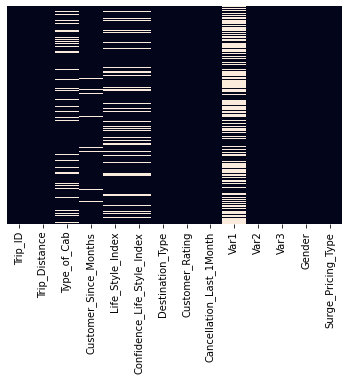

In [ ]:
ax = sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [ ]:
df.select_dtypes(include= 'object').columns

Index(['Trip_ID', 'Type_of_Cab', 'Confidence_Life_Style_Index',
       'Destination_Type', 'Gender'],
      dtype='object')

In [ ]:
df.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [ ]:
round(df.isnull().mean().sort_values(ascending=False)*100, 2)

Var1                           53.95
Type_of_Cab                    15.35
Life_Style_Index               15.34
Confidence_Life_Style_Index    15.34
Customer_Since_Months           4.50
Trip_ID                         0.00
Trip_Distance                   0.00
Destination_Type                0.00
Customer_Rating                 0.00
Cancellation_Last_1Month        0.00
Var2                            0.00
Var3                            0.00
Gender                          0.00
Surge_Pricing_Type              0.00
dtype: float64

## Treating the Null values



### Type_of_Cab

In [ ]:
# checking value counts
df.Type_of_Cab.value_counts(dropna=False)

B      31136
C      28122
A      21569
NaN    20210
D      18991
E      11634
Name: Type_of_Cab, dtype: int64

In [ ]:
# %age wise
df.Type_of_Cab.value_counts(normalize=True, dropna=False)

B      0.236484
C      0.213592
A      0.163821
NaN    0.153499
D      0.144241
E      0.088363
Name: Type_of_Cab, dtype: float64

In [ ]:
df.Type_of_Cab.mode()[0]

'B'

In [ ]:
# Replacing NaN with B (most frequent)
df.Type_of_Cab = df.Type_of_Cab.fillna('B')

In [ ]:
# sanity check
df.Type_of_Cab.value_counts(dropna=False)

B    51346
C    28122
A    21569
D    18991
E    11634
Name: Type_of_Cab, dtype: int64

In [ ]:
df.Type_of_Cab.isnull().sum()

0

### Customer_Since_Months

In [ ]:
# checking type
df.Customer_Since_Months.dtype

dtype('float64')

In [ ]:
# checking value counts
df.Customer_Since_Months.value_counts()

10.0    42680
2.0     11621
3.0     10351
0.0     10169
5.0      8641
1.0      8297
4.0      7726
7.0      7407
6.0      7375
8.0      6328
9.0      5147
Name: Customer_Since_Months, dtype: int64

In [ ]:
# checkimg the range of values
df.Customer_Since_Months.describe()

count    125742.000000
mean          6.016661
std           3.626887
min           0.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: Customer_Since_Months, dtype: float64

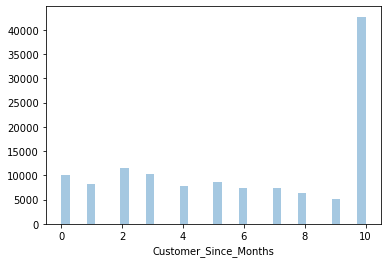

In [ ]:
sns.distplot(df.Customer_Since_Months, kde=False)
plt.show()

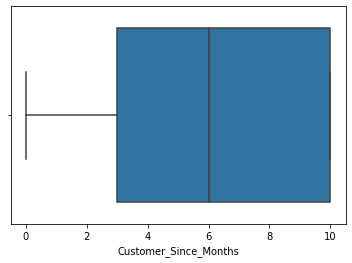

In [ ]:
ax = sns.boxplot(df.Customer_Since_Months)

In [ ]:
print(df.Customer_Since_Months.mean())
print(df.Customer_Since_Months.median())
print(df.Customer_Since_Months.mode()[0])

6.016661099712109
6.0
10.0


In [ ]:
# filling the missing values with median

df.Customer_Since_Months = df.Customer_Since_Months.fillna(df.Customer_Since_Months.median())

In [ ]:
# sanity check
df.Customer_Since_Months.isnull().sum()

0

### Life_Style_Index

In [ ]:
df.Life_Style_Index.dtype

dtype('float64')

In [ ]:
df.Life_Style_Index.describe()

count    111469.000000
mean          2.802064
std           0.225796
min           1.596380
25%           2.654730
50%           2.798050
75%           2.946780
max           4.875110
Name: Life_Style_Index, dtype: float64

<AxesSubplot:xlabel='Life_Style_Index'>

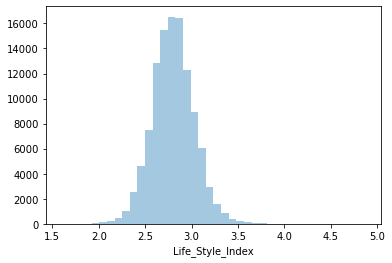

In [ ]:
# checking the distribution of values
sns.distplot(df.Life_Style_Index, kde=False, bins=40)

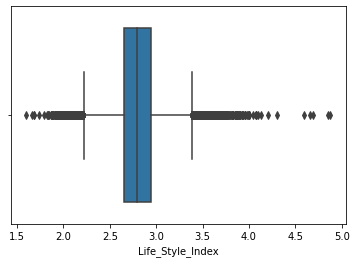

In [ ]:
# boxplot
ax = sns.boxplot(df.Life_Style_Index)

In [ ]:
df.Life_Style_Index.describe(percentiles=[0.05, .25, .50, .75, .90, .95, .99])

count    111469.000000
mean          2.802064
std           0.225796
min           1.596380
5%            2.445944
25%           2.654730
50%           2.798050
75%           2.946780
90%           3.080032
95%           3.174166
99%           3.381022
max           4.875110
Name: Life_Style_Index, dtype: float64

In [ ]:
df.Life_Style_Index.quantile([0.05, .25, .50, .75, .90, .95, .99])

0.05    2.445944
0.25    2.654730
0.50    2.798050
0.75    2.946780
0.90    3.080032
0.95    3.174166
0.99    3.381022
Name: Life_Style_Index, dtype: float64

In [ ]:
# upper fence limit (uf)
uf = 2.946 + 1.5*(2.946-2.654)
uf

3.3840000000000003

In [ ]:
# lower fence limit (lf)
lf = 2.654 - 1.5*(2.946-2.654)
lf

2.2159999999999993

In [ ]:
# imputing the missing values
df.Life_Style_Index = df.Life_Style_Index.fillna(4)

In [ ]:
# sanity check for missing values
df.Life_Style_Index.isnull().sum()

0

### Confidence_Life_Style_Index

In [ ]:
# checking dtype
df.Confidence_Life_Style_Index.dtype

dtype('O')

In [ ]:
# checking value counts
df.Confidence_Life_Style_Index.value_counts()

B    40355
C    35967
A    35147
Name: Confidence_Life_Style_Index, dtype: int64

In [ ]:
# checking mode
df.Confidence_Life_Style_Index.mode()[0]

'B'

In [ ]:
# imputing missing values with most frequent value i.e. 'B'
df.Confidence_Life_Style_Index = df.Confidence_Life_Style_Index.fillna('B')

In [ ]:
df.Confidence_Life_Style_Index.value_counts(dropna=False)

B    60548
C    35967
A    35147
Name: Confidence_Life_Style_Index, dtype: int64

In [ ]:
df.Confidence_Life_Style_Index.isnull().sum()

0

### Var1

In [ ]:
df.Var1.dtype

dtype('float64')

In [ ]:
df.Var1.isnull().sum()/len(df)*100

53.948747550546095

In [ ]:
df.Var1.describe()

count    60632.000000
mean        64.202698
std         21.820447
min         30.000000
25%         46.000000
50%         61.000000
75%         80.000000
max        210.000000
Name: Var1, dtype: float64

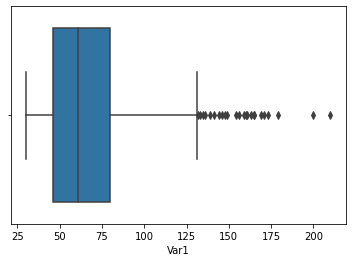

In [ ]:
ax = sns.boxplot(x = df.Var1)

In [ ]:
df.Var1.describe(percentiles=[0.05, .25, .50, .75, .90, .95, .99])

count    60632.000000
mean        64.202698
std         21.820447
min         30.000000
5%          35.000000
25%         46.000000
50%         61.000000
75%         80.000000
90%         98.000000
95%        104.000000
99%        110.000000
max        210.000000
Name: Var1, dtype: float64

In [ ]:
# finding the permissible value of outer fence
uf = 80 + 1.5*(80-46)
uf

131.0

In [ ]:
#
# capping the values to 131
df = df[( df.Var1 <= 131.0 )]

In [ ]:
df.Var1.describe()

count    60608.000000
mean        64.165622
std         21.741617
min         30.000000
25%         46.000000
50%         61.000000
75%         80.000000
max        131.000000
Name: Var1, dtype: float64

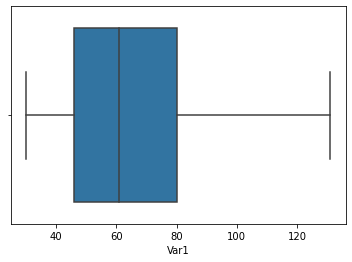

In [ ]:
# sanity check for outliers
ax = sns.boxplot(x = df.Var1)

#### The outliers seems to be managed

In [ ]:
# checking %age null values of Var1
df.Var1.isnull().sum()/len(df)*100

0.0

In [ ]:
# checking null values again
df.Var1.isnull().sum()

0

In [ ]:
# Checking the null values in data
df.isnull().sum()

Trip_ID                        0
Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Var2                           0
Var3                           0
Gender                         0
Surge_Pricing_Type             0
dtype: int64

### All feature have 0 null values

In [ ]:
# dropping the Id column

df = df.drop('Trip_ID', axis=1)
df.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,6.77,B,1.0,2.42769,A,A,3.9050,0,40.0,46,60,Female,2
1,29.47,B,10.0,2.78245,B,A,3.4500,0,38.0,56,78,Male,2
4,54.95,C,10.0,3.03453,B,A,3.4025,4,51.0,49,102,Male,2
5,19.06,E,10.0,4.00000,B,A,2.5975,1,72.0,63,91,Male,3
6,29.72,E,10.0,2.83958,C,B,2.9750,1,83.0,50,75,Male,2


In [ ]:
# creating categorical and numerical col

cat_col = []
num_col = []

for i in df.columns:
    if (df[i].dtypes == 'object'):
        cat_col.append(i)
    else:
        num_col.append(i)

In [ ]:
cat_col

['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type', 'Gender']

In [ ]:
num_col

['Trip_Distance',
 'Customer_Since_Months',
 'Life_Style_Index',
 'Customer_Rating',
 'Cancellation_Last_1Month',
 'Var1',
 'Var2',
 'Var3',
 'Surge_Pricing_Type']

## Data Visualization

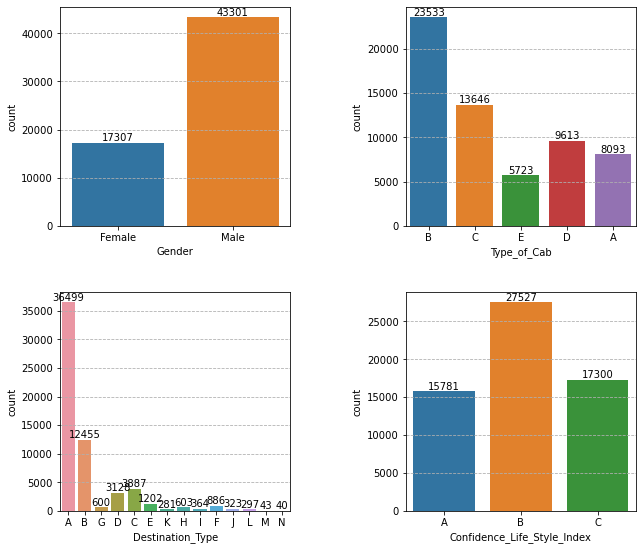

In [ ]:
# plotting for different categorical features

plt.figure(figsize=(10, 10))

plt.subplot(2,2,1)
ax = sns.countplot(df.Gender)
plt.grid(axis='y', ls='--')
ax.bar_label(ax.containers[0], label_type='edge')

plt.subplot(2,2,2)
ax = sns.countplot(df.Type_of_Cab)
plt.grid(axis='y', ls='--')
ax.bar_label(ax.containers[0], label_type='edge')

plt.subplot(2,2,3)
ax = sns.countplot(df.Destination_Type)
plt.grid(axis='y', ls='--')
ax.bar_label(ax.containers[0], label_type='edge')

plt.subplot(2,2,4)
ax = sns.countplot(df.Confidence_Life_Style_Index)
plt.grid(axis='y', ls='--')
ax.bar_label(ax.containers[0], label_type='edge')

plt.subplots_adjust(left=0.2,
                    bottom=0.2,
                    right=1,
                    top=0.9,
                    wspace=0.5,
                    hspace=0.3)
plt.show()

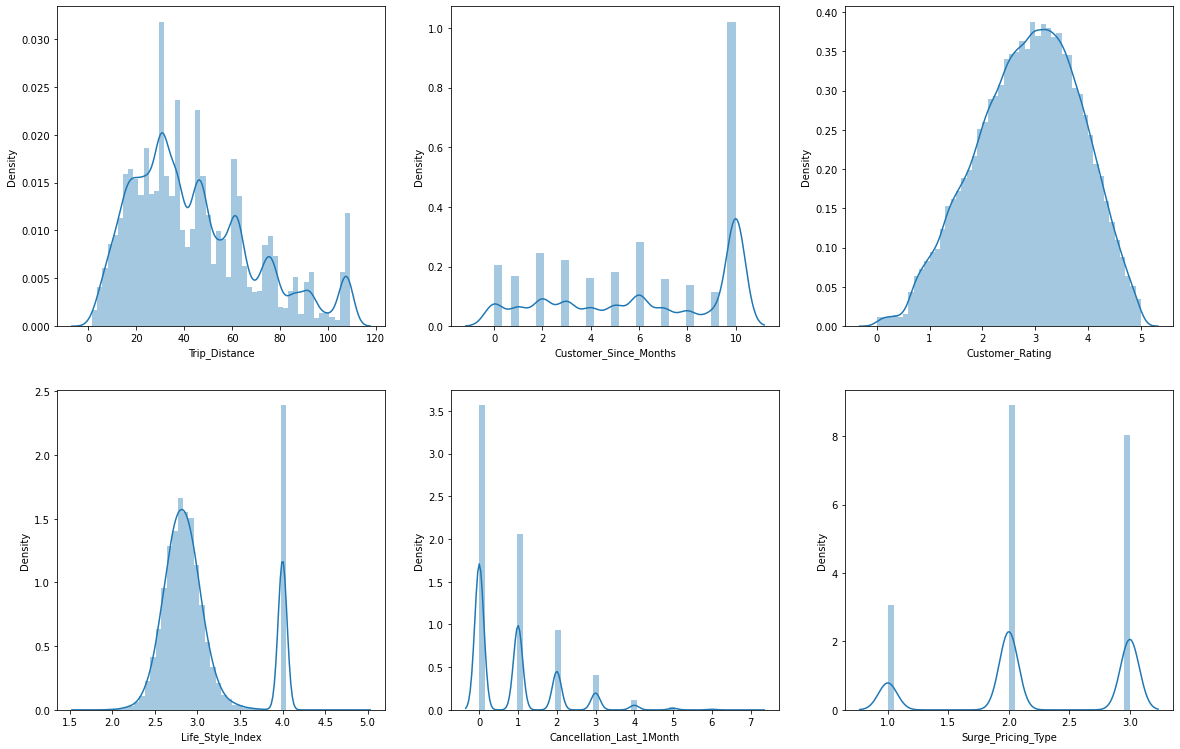

In [ ]:
# plotting for numerical features

plt.figure(figsize=(20, 20))

plt.subplot(3,3,1)
ax = sns.distplot(df.Trip_Distance)
# ax.bar_label(ax.containers[0], label_type='edge')

plt.subplot(3,3,2)
ax = sns.distplot(df.Customer_Since_Months)
# ax.bar_label(ax.containers[0], label_type='edge')

plt.subplot(3,3,3)
ax = sns.distplot(df.Customer_Rating)
# ax.bar_label(ax.containers[0], label_type='edge')

plt.subplot(3,3,4)
ax = sns.distplot(df.Life_Style_Index)
# ax.bar_label(ax.containers[0], label_type='edge')

plt.subplot(3,3,5)
ax = sns.distplot(df.Cancellation_Last_1Month)
# ax.bar_label(ax.containers[0], label_type='edge')

plt.subplot(3,3,6)
ax = sns.distplot(df.Surge_Pricing_Type)
# ax.bar_label(ax.containers[0], label_type='edge')

plt.show()

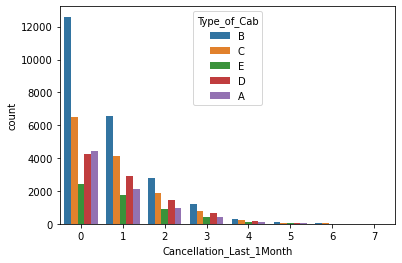

In [ ]:
# plotting Cancellation_Last_1Month with Type of cab
ax = sns.countplot(df.Cancellation_Last_1Month, hue= df.Type_of_Cab)


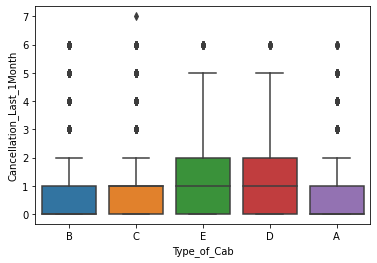

In [ ]:
# plotting Cancellation_Last_1Month with Type of cab
ax = sns.boxplot(y = df.Cancellation_Last_1Month, x = df.Type_of_Cab )

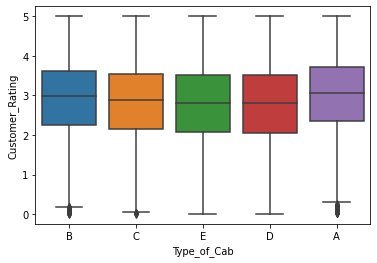

In [ ]:
# plotting customer rating with type of cab
ax = sns.boxplot(y = df.Customer_Rating, x = df.Type_of_Cab )

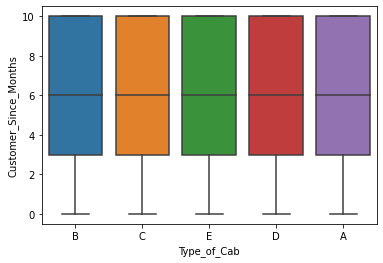

In [ ]:
# plotting Customer_Since_Months with Type of cab

ax = sns.boxplot(y = df.Customer_Since_Months, x = df.Type_of_Cab)

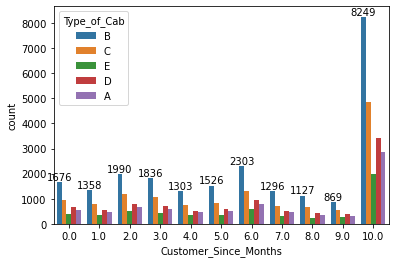

In [ ]:
ax = sns.countplot(df.Customer_Since_Months, hue = df.Type_of_Cab)
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

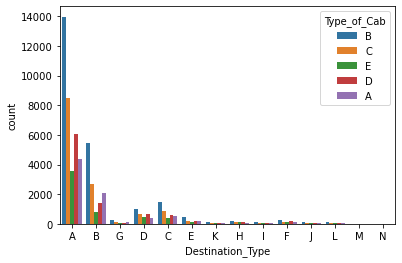

In [ ]:
# plotting b/w Destination_Type and Type of cab
ax = sns.countplot(df.Destination_Type, hue= df.Type_of_Cab)

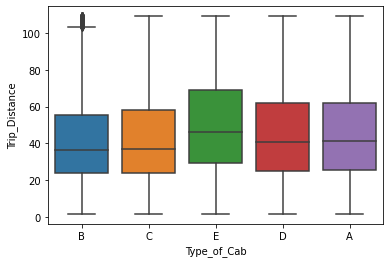

In [ ]:
# ploting b/w Trip distance and type of cab

ax = sns.boxplot(y = df.Trip_Distance, x = df.Type_of_Cab)

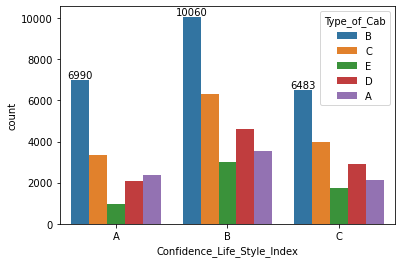

In [ ]:
# ploting b/w Confidence_Life_Style_Index and Type_of_Cab

ax = sns.countplot(df.Confidence_Life_Style_Index, hue= df.Type_of_Cab)
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

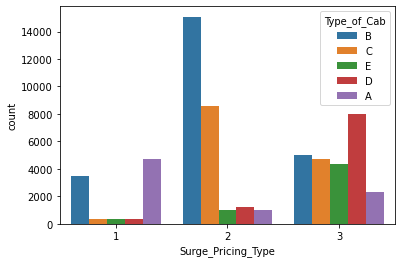

In [ ]:
# ploting b/w Surge Pricing type and Type of cab

ax = sns.countplot(df.Surge_Pricing_Type, hue=df.Type_of_Cab)

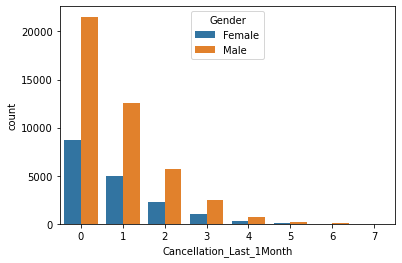

In [ ]:
# checking cancellations_last_months w.r.t Gender
ax = sns.countplot(df.Cancellation_Last_1Month, hue= df.Gender)

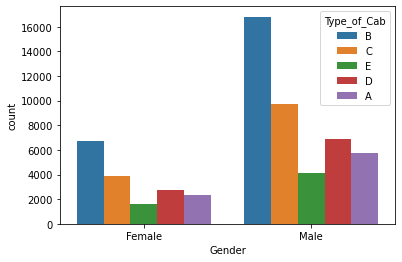

In [ ]:
# plotting Gender and Type of cab preference

ax = sns.countplot(df.Gender, hue= df.Type_of_Cab)

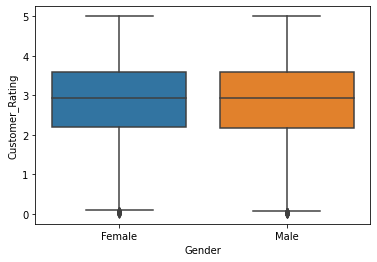

In [ ]:
# ploting Customer rating Vs Gender

ax = sns.boxplot(y = df.Customer_Rating, x = df.Gender)

<AxesSubplot:xlabel='Customer_Since_Months', ylabel='Cancellation_Last_1Month'>

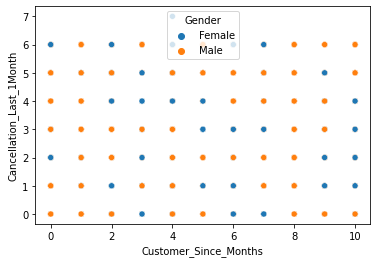

In [ ]:
# plotting Customer_Since_Months Vs Cancellation_Last_1Month with Gender

sns.scatterplot(df.Customer_Since_Months, df.Cancellation_Last_1Month, hue= df.Gender)

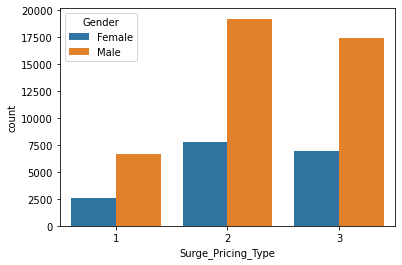

In [ ]:
# ploting Surge_Pricing_Type Vs Gender

ax = sns.countplot(df.Surge_Pricing_Type, hue=df.Gender)

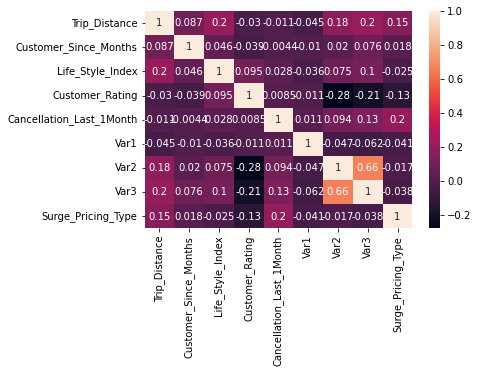

In [ ]:
# checking correlation b/w columns

ax = sns.heatmap(df.corr(), annot=True)

## Data Preprocessing

In [ ]:
df.dtypes

Trip_Distance                  float64
Type_of_Cab                     object
Customer_Since_Months          float64
Life_Style_Index               float64
Confidence_Life_Style_Index     object
Destination_Type                object
Customer_Rating                float64
Cancellation_Last_1Month         int64
Var1                           float64
Var2                             int64
Var3                             int64
Gender                          object
Surge_Pricing_Type               int64
dtype: object

In [ ]:
columns = ['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
           'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3', 'Surge_Pricing_Type']

In [ ]:
# StandardScaler for continous columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(df[columns])

df.head(7)

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
4,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2
5,19.06,E,10.0,4.00000,B,A,2.59750,1,72.0,63,91,Male,3
6,29.72,E,10.0,2.83958,C,B,2.97500,1,83.0,50,75,Male,2
7,18.44,B,2.0,2.81871,B,A,3.58250,0,103.0,46,63,Male,2
10,46.07,D,10.0,2.95887,C,B,2.49125,2,89.0,48,69,Female,2


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# LabelEncoding for Categorical columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["Type_of_Cab"]=le.fit_transform(df["Type_of_Cab"])
df["Confidence_Life_Style_Index"] =le.fit_transform(df["Confidence_Life_Style_Index"])
df["Destination_Type"]=le.fit_transform(df["Destination_Type"])
df["Gender"]=le.fit_transform(df["Gender"])

In [ ]:
df.head(7)

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,6.77,1,1.0,2.42769,0,0,3.90500,0,40.0,46,60,0,2
1,29.47,1,10.0,2.78245,1,0,3.45000,0,38.0,56,78,1,2
4,54.95,2,10.0,3.03453,1,0,3.40250,4,51.0,49,102,1,2
5,19.06,4,10.0,4.00000,1,0,2.59750,1,72.0,63,91,1,3
6,29.72,4,10.0,2.83958,2,1,2.97500,1,83.0,50,75,1,2
7,18.44,1,2.0,2.81871,1,0,3.58250,0,103.0,46,63,1,2
10,46.07,3,10.0,2.95887,2,1,2.49125,2,89.0,48,69,0,2


In [ ]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 300, n_init = 10,random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

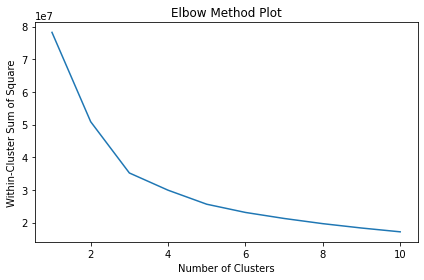

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Square') # Within cluster sum of squares
plt.tight_layout()
plt.show()

In [ ]:
df.isnull().sum()

Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Var1                           0
Var2                           0
Var3                           0
Gender                         0
Surge_Pricing_Type             0
dtype: int64

In [ ]:
#Forming clusters on various parameters using Kmeans : [groups customers with similar behaviour in one cluster]

c1 = df[['Trip_Distance', 'Life_Style_Index']]

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
model = km.fit(c1)
model.labels_

array([1, 1, 2, ..., 1, 2, 1])

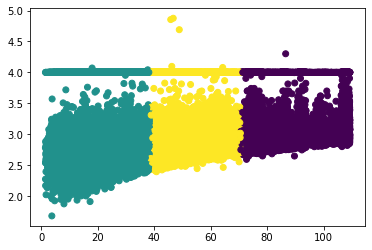

In [ ]:
# making scatter plot b/w Trip_distance and Life_Style_Index
plt.scatter(c1.Trip_Distance, c1.Life_Style_Index, c=model.labels_)
plt.show()

In [ ]:
c1 = df[["Trip_Distance","Life_Style_Index"]][0:50]

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=4)
model = agc.fit(c1)
model.labels_

array([1, 3, 2, 1, 3, 1, 2, 3, 1, 0, 1, 2, 3, 1, 1, 0, 3, 0, 3, 3, 1, 2,
       2, 1, 2, 1, 2, 3, 0, 1, 1, 2, 3, 2, 2, 1, 3, 1, 1, 3, 0, 1, 3, 2,
       1, 3, 2, 2, 0, 3], dtype=int64)

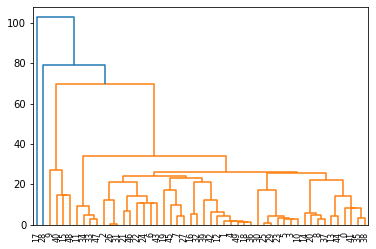

In [ ]:
from scipy.spatial import distance_matrix
DM = pd.DataFrame(distance_matrix(c1.values, c1.values))
from scipy.cluster.hierarchy import dendrogram, linkage
dendrogram(linkage(DM))
plt.show()

In [ ]:
c2 = df[['Trip_Distance', 'Customer_Rating']]

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
model = km.fit(c2)
model.labels_

array([1, 1, 0, ..., 1, 0, 1])

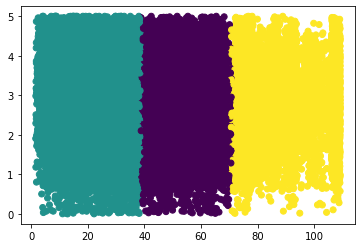

In [ ]:
# scatter plot b/w Trip distance and Customer rating
plt.scatter(c2.Trip_Distance, c2.Customer_Rating, c=model.labels_)
plt.show()

In [ ]:
c2 = df[["Trip_Distance","Customer_Rating"]][0:50]

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=4)
model = agc.fit(c2)
model.labels_

array([2, 0, 3, 2, 0, 2, 0, 0, 2, 1, 2, 3, 0, 2, 2, 1, 0, 1, 0, 0, 2, 3,
       0, 2, 0, 2, 3, 0, 1, 2, 2, 3, 0, 3, 3, 2, 0, 2, 2, 0, 1, 2, 0, 0,
       2, 0, 3, 3, 1, 0], dtype=int64)

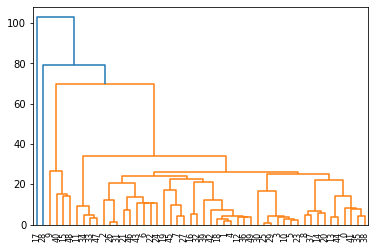

In [ ]:
from scipy.spatial import distance_matrix
DM = pd.DataFrame(distance_matrix(c2.values, c2.values))
from scipy.cluster.hierarchy import dendrogram,linkage
dendrogram(linkage(DM))
plt.show()

In [ ]:
c3 = df[["Life_Style_Index","Customer_Rating"]]

from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
model = km.fit(c3)
model.labels_

array([2, 2, 2, ..., 0, 2, 0])

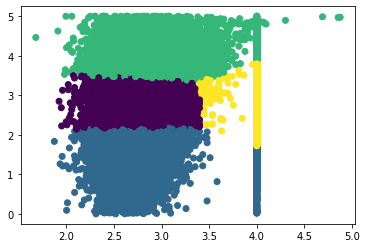

In [ ]:
# scatter plot b/w Life_Style_Index and Customer rating
plt.scatter(c3.Life_Style_Index, c3.Customer_Rating, c=model.labels_)
plt.show()

In [ ]:
c3 = df[["Life_Style_Index","Customer_Rating"]][0:50]
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=4)
model = agc.fit(c3)
model.labels_

array([3, 1, 1, 1, 0, 1, 0, 0, 3, 0, 3, 1, 0, 0, 0, 2, 0, 2, 3, 0, 0, 1,
       0, 1, 1, 0, 1, 2, 1, 0, 0, 2, 2, 0, 1, 0, 0, 0, 3, 3, 1, 1, 3, 3,
       2, 1, 0, 3, 0, 0], dtype=int64)

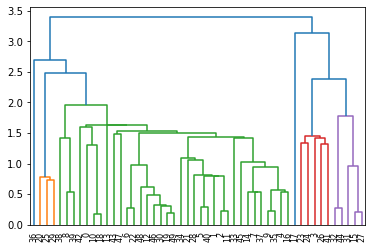

In [ ]:
from scipy.spatial import distance_matrix
DM = pd.DataFrame(distance_matrix(c3.values,c3.values))
from scipy.cluster.hierarchy import dendrogram,linkage
dendrogram(linkage(DM))
plt.show()